In [1]:
!pip install transformers==4.28.0
!pip install accelerate -U

from google.colab import drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 114.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 2.5 MB/s eta 0:00:00
Mounted at /content/drive


In [10]:
from transformers import TextDataset, DataCollatorForLanguageModeling
from transformers import Trainer, TrainingArguments
from transformers import GPT2Tokenizer, GPT2LMHeadModel

file_path = "/content/drive/MyDrive/input.txt"
block_size = 512
num_epochs = 100
output_dir = "/content/drive/MyDrive/GPT2_Results"
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')
save_steps = 100

train_dataset = TextDataset(
        tokenizer = tokenizer,
        file_path = file_path,
        block_size = block_size,
    )

data_collator = DataCollatorForLanguageModeling(
        tokenizer=tokenizer,
        mlm=False,
    )

/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


In [11]:
training_args = TrainingArguments(
        output_dir=output_dir,
        num_train_epochs=num_epochs,
        save_steps=save_steps
    )

trainer = Trainer(
          model=model,
          args=training_args,
          data_collator=data_collator,
          train_dataset=train_dataset,
    )

trainer.train()
tokenizer.save_pretrained(output_dir)
model.save_pretrained(output_dir)

Step,Training Loss
500,3.311600
1000,2.864800
1500,2.508100
2000,2.179000


Step,Training Loss
500,3.311600
1000,2.864800
1500,2.508100
2000,2.179000


KeyboardInterrupt: ignored

In [24]:
def generate_text(sequence, max_length):
    model_path = "/content/drive/MyDrive/GPT2_Results"
    model = GPT2LMHeadModel.from_pretrained(model_path)
    tokenizer = GPT2Tokenizer.from_pretrained(model_path)
    ids = tokenizer.encode(f'{sequence}', return_tensors='pt')
    final_outputs = model.generate(
        ids,
        do_sample=True,
        max_length=max_length,
        pad_token_id=model.config.eos_token_id,
        top_k=50,
        top_p=0.95,
    )
    print(tokenizer.decode(final_outputs[0], skip_special_tokens=True))

# generate_text("thou beautiful", 250)
train_losses = []
for item in trainer.state.log_history:
  train_losses.append(item['loss'])


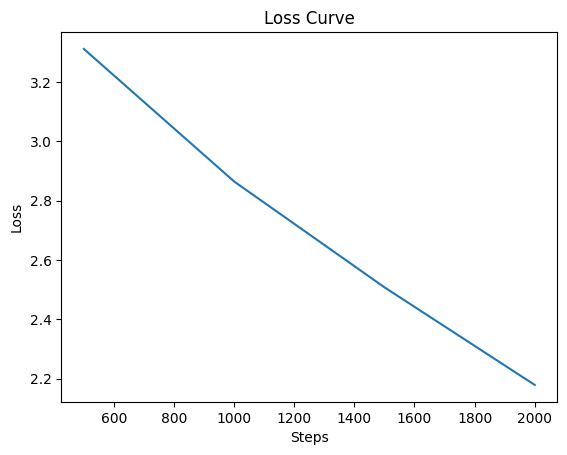

In [25]:
import numpy as np
import matplotlib.pyplot as plt

steps = np.arange(500, 500*(len(train_losses)+1), 500)

plt.plot(steps, train_losses)
plt.title("Loss Curve")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.show()